In [1]:
!pip install gym



In [1]:
import gym
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human", new_step_api=True)


In [3]:
import numpy as np


state_space = env.observation_space.n
action_space = env.action_space.n

q_table = np.zeros((state_space, action_space))


In [4]:
episodes = 1000
learning_rate = 0.1      # α
discount_factor = 0.99   # γ
epsilon = 1.0            # exploration rate
max_steps = 100
epsilon_decay = 0.995
min_epsilon = 0.01


In [13]:
!pip install numpy==1.24.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 96.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.4.0 requires numpy>=1.26, but you have numpy 1.24

In [9]:
state = env.reset()



In [11]:
next_state, reward, done, info = env.step(action)


In [14]:
for ep in range(episodes):
    state = env.reset()  # state is a number 0–15
    done = False

    for _ in range(max_steps):
        # Exploration vs Exploitation
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, _ = env.step(action)


        # Update Q-table
        q_table[state, action] = q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action]
        )

        state = next_state

        if done:
            break

    # Decay exploration
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

print("Training finished!")


Training finished!


In [17]:
total_rewards = 0

for ep in range(100):
    state = env.reset()
    done = False
    while not done:
        action = np.argmax(q_table[state])
        next_state, reward, done, _ = env.step(action)
        state = next_state

        total_rewards += reward

print(f"Average reward over 100 episodes: {total_rewards / 100:.2f}")


Average reward over 100 episodes: 1.00


In [18]:
rewards_per_episode = []

for ep in range(episodes):
    ...
    total_reward = 0
    for _ in range(max_steps):
        ...
        total_reward += reward
        ...
    rewards_per_episode.append(total_reward)


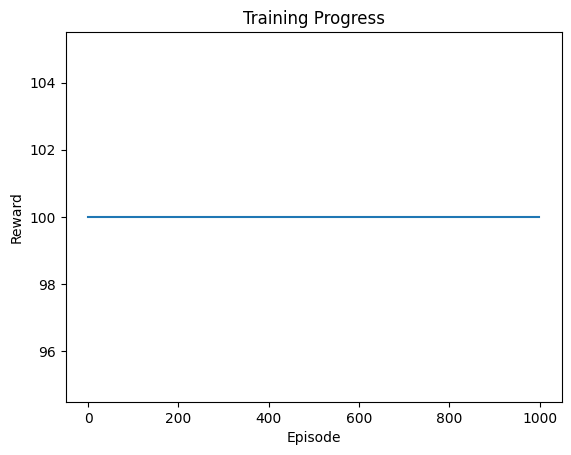

In [19]:
import matplotlib.pyplot as plt
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Progress")
plt.show()


In [20]:
state = env.reset()
done = False
env.render()

while not done:
    action = np.argmax(q_table[state])
    state, reward, done, _ = env.step(action)
    env.render()


/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/